In [73]:
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [74]:
class ScratchDecesionTreeClassifierDepth1():
    def __init__(self, verbose =False):
        self.verbose = verbose
        
    def _gini(self, X):
        unique, count = np.unique(X, return_counts=True)
        tmp = 0
        
        for i in unique:
            tmp += (count[unique==i]/np.sum(count))**2
        return 1-tmp
    
    def fit(self, X, y):
        
        feature_num = X.shape[1]
        
        self.gain = 0
        for i in range(feature_num):
            self.threshold = np.unique(X[:, i])
            
            #ここで[1:]をしている理由が意味不
            for j in self.threshold[1:]:
                l = y[X[:, i]<j]
                r =y[X[:, i]>=j]
                
                gini_l = len(l)/(len(l)+len(r))*self._gini(l)
                gini_r = len(r)/(len(l)+len(r))*self._gini(r)
                
                tmp = self._gini(y) -gini_l - gini_r
                
                if tmp > self.gain:
                    self.l_label = statistics.mode(l)
                    self.r_label = statistics.mode(r)
                    self.feature = i
                    self.threshold =j
                    self.gain = tmp
                    
                    if self.verbose:
                        print('feature', self.feature, 
                                  'threshold', self.threshold, 
                                  'gain', self.gain)
    
    def predict(self, X):
        return np.where(X[:, self.feature]<self.threshold, self.l_label, self.r_label)

In [83]:
# 決定領域の可視化
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X,y,model,step=0.01,
                    title='decision region', xlabel='xlabel', ylabel='ylabel',
                    target_names=['versicolor', 'virginica']
                   ):
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [32]:
X = np.array([0, 2, 1, -1, 4])
y = np.array([0, 0, 0, 1, 1])

In [33]:
threshold_value, counts = np.unique(X, return_counts=True)
print('threshold_value', threshold_value, 'counts', counts)

threshold_value [-1  0  1  2  4] counts [1 1 1 1 1]


In [34]:
u, counts = np.unique(y, return_counts= True)
print('unique', u, 'unique_counts', counts)

unique [0 1] unique_counts [3 2]


In [62]:
def _gini(X):
    unique, count = np.unique(X, return_counts =True)
    
    tmp = 0
    for i in unique:
        tmp = tmp+ (count[unique==i]/np.sum(count))**2
    return 1-tmp

In [37]:
for i in threshold_value[1:]:
    c1 = y[X<i]
    c2 = y[X>=i]
    
    print(i, 'c1', c1, 'c2', c2)
    print(i,'gini_left:',_gini(c1),'gini_right:',_gini(c2))

0 c1 [1] c2 [0 0 0 1]
[1]
1
[3]
4
[1]
4
0 gini_left: [0.] gini_right: [0.375]
1 c1 [0 1] c2 [0 0 1]
[1]
2
[1]
2
[2]
3
[1]
3
1 gini_left: [0.5] gini_right: [0.44444444]
2 c1 [0 0 1] c2 [0 1]
[2]
3
[1]
3
[1]
2
[1]
2
2 gini_left: [0.44444444] gini_right: [0.5]
4 c1 [0 0 0 1] c2 [1]
[3]
4
[1]
4
[1]
1
4 gini_left: [0.375] gini_right: [0.]


In [39]:
for i in threshold_value[1:]:
    c1 = y[X<i]
    c2 = y[X>=i]
    
    left = len(c1)/(len(c1)+len(c2))*_gini(c1)
    right = len(c2)/(len(c1)+len(c2))*_gini(c2)
    
    gain = _gini(X) -left-right
    print(i, gain)

[1]
1
[3]
4
[1]
4
[1]
5
[1]
5
[1]
5
[1]
5
[1]
5
0 [0.5]
[1]
2
[1]
2
[2]
3
[1]
3
[1]
5
[1]
5
[1]
5
[1]
5
[1]
5
1 [0.33333333]
[2]
3
[1]
3
[1]
2
[1]
2
[1]
5
[1]
5
[1]
5
[1]
5
[1]
5
2 [0.33333333]
[3]
4
[1]
4
[1]
1
[1]
5
[1]
5
[1]
5
[1]
5
[1]
5
4 [0.5]


In [45]:
# サンプルデータ2
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
              [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
              [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
              [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
              [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
              [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
              [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
              [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
              [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
              [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
              [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
              [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
              [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
              [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
              [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
              [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
              [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
              [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
              [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
              [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

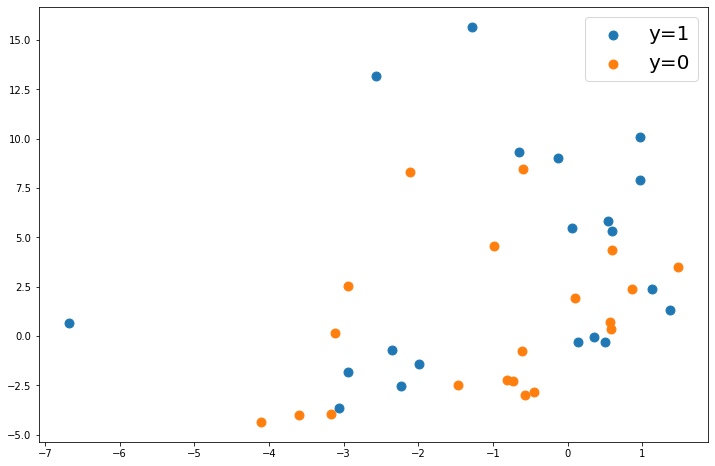

In [43]:
# シンプルデータ2を可視化
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(X[y==1,0],X[y==1,1],s=80,label='y=1')
plt.scatter(X[y==0,0],X[y==0,1],s=80,label='y=0')
plt.legend();

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X,y,train_size=0.8,random_state=None)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32, 2)
(32,)
(8, 2)
(8,)


In [75]:
clf1 = ScratchDecesionTreeClassifierDepth1(verbose=True)
clf1.fit(X_train, y_train)

feature 0 threshold -4.1013 gain [0.01612903]
feature 0 threshold -3.0603 gain [0.01785714]
feature 0 threshold -0.65259 gain [0.01821862]
feature 0 threshold -0.57242 gain [0.03125]
feature 0 threshold -0.44699 gain [0.04901961]
feature 0 threshold -0.12243 gain [0.07142857]
feature 1 threshold -1.3927 gain [0.09375]
feature 1 threshold 4.5718 gain [0.10606061]
feature 1 threshold 5.3524 gain [0.14545455]


In [76]:
y_pred = clf1.predict(X_test)

In [77]:
print(y_pred)
print(y_test)

[0 0 1 0 0 0 0 0]
[1 1 0 0 1 0 1 0]


In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy', accuracy)
print('precision', precision)
print('recall', recall)
print('f1', f1)

accuracy 0.375
precision 0.0
recall 0.0
f1 0.0


In [80]:
from sklearn.tree import DecisionTreeClassifier

clf2 = DecisionTreeClassifier(max_depth=1)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

In [81]:
print(y_pred)
print(y_test)

[0 0 1 0 0 0 0 0]
[1 1 0 0 1 0 1 0]


In [82]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy', accuracy)
print('precision', precision)
print('recall', recall)
print('f1', f1)

accuracy 0.375
precision 0.0
recall 0.0
f1 0.0


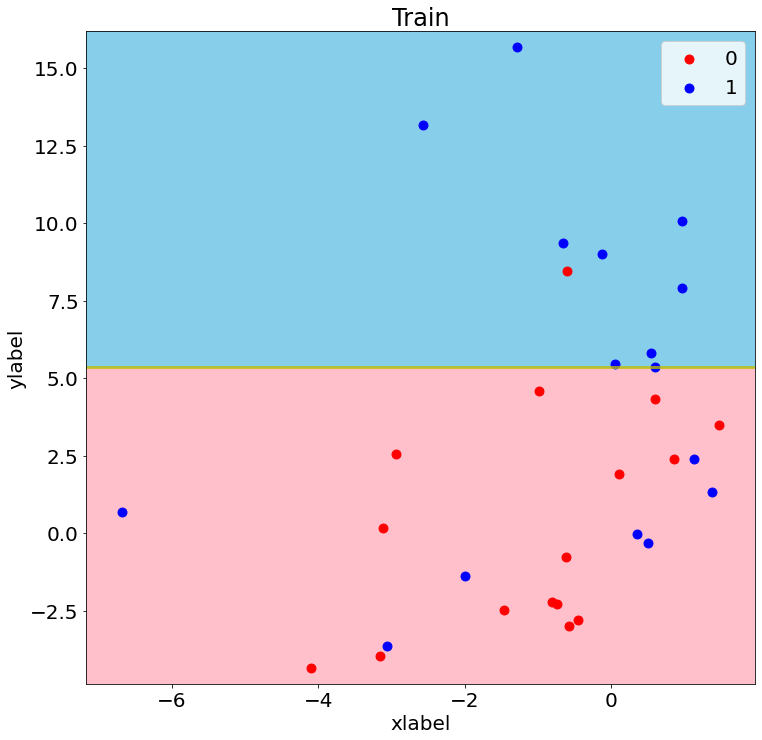

In [85]:
fit, ax = plt.subplots(figsize =(12, 12))
plt.rcParams['font.size']=20
decision_region(X_train, y_train, clf1, target_names=['0', '1'], title ='Train')

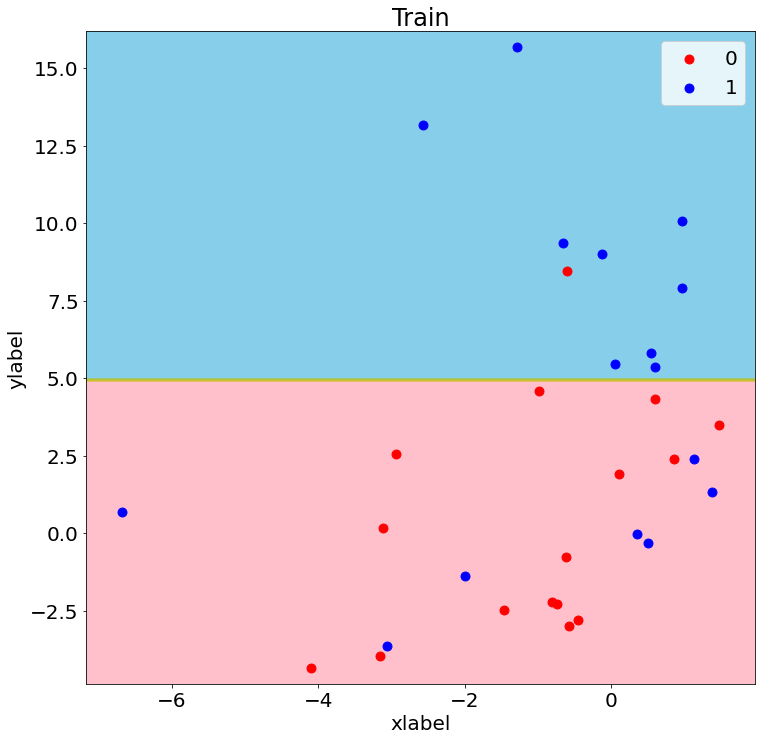

In [86]:
fit, ax = plt.subplots(figsize =(12, 12))
plt.rcParams['font.size']=20
decision_region(X_train, y_train, clf2, target_names=['0', '1'], title ='Train')